# Cinemática Directa usando Análisis Geométrico: Robot SCARA
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/oscar-ramos/fundamentos-robotica-python/blob/main/4-Cinematica-Directa/4-2-Metodo-Geometrico-RobotScara.ipynb)

Oscar E. Ramos Ponce, Universidad de Ingeniería y Tecnología - UTEC

Fundamentos de Robótica

### 1.&nbsp;Cálculo Simbólico de la Cinemática Directa

Se utilizará sympy para encontrar las matrices de transformación homogéneas y sus productos

In [1]:
import sympy as sp     # Biblioteca para el cálculo simbólico

In [2]:
def sTrasl(x, y, z):
    """ Transformación homogénea que representa traslación pura
    """
    T = sp.Matrix([[1,0,0,x],
                   [0,1,0,y],
                   [0,0,1,z],
                   [0,0,0,1]])
    return T

def sTrotx(ang):
    """ Transformación homogénea que representa rotación alrededor de x
    """
    T = sp.Matrix([[1, 0,0,0],
                   [0, sp.cos(ang),-sp.sin(ang),0],
                   [0, sp.sin(ang), sp.cos(ang),0],
                   [0, 0, 0, 1]])
    return T

def sTrotz(ang):
    """ Transformación homogénea que representa rotación alrededor de z
    """
    T = sp.Matrix([[sp.cos(ang),-sp.sin(ang),0,0],
                   [sp.sin(ang), sp.cos(ang),0,0],
                   [0,0,1,0],
                   [0,0,0,1]])
    return T

In [3]:
# Variables que serán utilizadas
q1, q2, q3, q4 = sp.symbols("q1 q2 q3 q4")
l1, l2, l3, l4 = sp.symbols("l1 l2 l3 l4")

# Transformaciones con respecto al sistema anterior
T01 = sTrasl(0,0,l1)*sTrotz(sp.pi+q1)
T12 = sTrasl(l2,0,0)*sTrotz(-sp.pi/2+q2)
T23 = sTrasl(l3,0,0)
T34 = sTrasl(0,0,-l4+q3)*sTrotz(sp.pi/2+q4)

# Transformación del eslabón 4 con respecto a la base (0)
T04 = sp.simplify(T01*T12*T23*T34)

# Mostrar las transformaciones homogéneas (display funciona con IPython)
print("T01:"); display(T01)
print("T12:"); display(T12)
print("T23:"); display(T23)
print("T34:"); display(T34)
print("T04:"); display(T04)

T01:


Matrix([
[-cos(q1),  sin(q1), 0,  0],
[-sin(q1), -cos(q1), 0,  0],
[       0,        0, 1, l1],
[       0,        0, 0,  1]])

T12:


Matrix([
[ sin(q2), cos(q2), 0, l2],
[-cos(q2), sin(q2), 0,  0],
[       0,       0, 1,  0],
[       0,       0, 0,  1]])

T23:


Matrix([
[1, 0, 0, l3],
[0, 1, 0,  0],
[0, 0, 1,  0],
[0, 0, 0,  1]])

T34:


Matrix([
[-sin(q4), -cos(q4), 0,        0],
[ cos(q4), -sin(q4), 0,        0],
[       0,        0, 1, -l4 + q3],
[       0,        0, 0,        1]])

T04:


Matrix([
[-cos(q1 + q2 + q4),  sin(q1 + q2 + q4), 0, -l2*cos(q1) - l3*sin(q1 + q2)],
[-sin(q1 + q2 + q4), -cos(q1 + q2 + q4), 0, -l2*sin(q1) + l3*cos(q1 + q2)],
[                 0,                  0, 1,                  l1 - l4 + q3],
[                 0,                  0, 0,                             1]])

In [4]:
# Transformación del efector final con respecto al sistema 4
T4e = sTrotx(sp.pi)

# Transformación del efector final con respecto a la base (0)
T0e = sp.simplify(T04*T4e)
print("T0e:"); display(T0e)

T0e:


Matrix([
[-cos(q1 + q2 + q4), -sin(q1 + q2 + q4),  0, -l2*cos(q1) - l3*sin(q1 + q2)],
[-sin(q1 + q2 + q4),  cos(q1 + q2 + q4),  0, -l2*sin(q1) + l3*cos(q1 + q2)],
[                 0,                  0, -1,                  l1 - l4 + q3],
[                 0,                  0,  0,                             1]])

In [5]:
# Valor cuando todos los ángulos son cero
print("T0e cuando q=(0,0,0,0):")
T0e.subs({q1:0, q2:0, q3:0, q4:0}) 
# Equivalente a: T0e.subs([ (q1,0), (q2,0), (q3,0), (q4,0)])

# También se podría reemplazar las longitudes
# T0e.subs({q1:0, q2:0, q3:0, q4:0, l1:1, l2:1, l3:1, l4:0.5})

T0e cuando q=(0,0,0,0):


Matrix([
[-1, 0,  0,     -l2],
[ 0, 1,  0,      l3],
[ 0, 0, -1, l1 - l4],
[ 0, 0,  0,       1]])

### 2.&nbsp;Cálculo Numérico de la Cinemática Directa

En este caso se utilizará numpy para el manejo de matrices y vectores

In [6]:
import numpy as np

def Trotx(ang):
    """ Transformación homogénea que representa rotación en x
    """
    T = np.array([[1., 0., 0., 0.],
                  [0., np.cos(ang), -np.sin(ang), 0.],
                  [0., np.sin(ang),  np.cos(ang), 0.],
                  [0., 0., 0., 1.]])
    return T

def Troty(ang):
    """" Transformación homogénea que representa rotación en y
    """
    T = np.array([[np.cos(ang), 0., np.sin(ang), 0.],
                  [0., 1., 0., 0.],
                  [-np.sin(ang), 0., np.cos(ang), 0.],
                  [0., 0., 0., 1.]])
    return T

def Trotz(ang):
    """ Transformación homogénea que representa rotación en z
    """
    T = np.array([[np.cos(ang), -np.sin(ang), 0., 0.],
                  [np.sin(ang),  np.cos(ang), 0., 0.],
                  [0., 0., 1., 0.],
                  [0., 0., 0., 1.]])
    return T

def Trasl(x, y, z):
    """ Transformación homogénea que representa traslación pura
    """
    T = np.array([[1,0,0,x],
                  [0,1,0,y],
                  [0,0,1,z],
                  [0,0,0,1]])
    return T

In [7]:
# Cinemática directa del robot
def cdirecta_scara(q, l1, l2, l3, l4):
    """ Retorna los sistemas de referencia de cada eslabón con respecto a la base
    """
    # Sistemas con respecto al sistema anterior
    T01 = Trasl(0.,0.,l1) @ Trotz(np.pi+q[0])
    T12 = Trasl(l2,0.,0.) @ Trotz(-np.pi/2+q[1])
    T23 = Trasl(l3,0.,0.)
    T34 = Trasl(0.,0.,-l4+q[2]) @ Trotz(np.pi/2+q[3])
    T4e = Trotx(np.pi)

    # Sistemas con respecto a la base
    T02 = T01 @ T12
    T03 = T02 @ T23
    T04 = T03 @ T34
    T0e = T04 @ T4e
    return T0e, (T01, T02, T03, T04)

In [8]:
# Ejemplo de cálculo de la cinemática directa
l1 = 1.0                               # Longitud eslabón 1
l2 = 1.0                               # Longitud eslabón 2
l3 = 1.0                               # Longitud eslabón 3 
l4 = 0.5
q = [np.deg2rad(0), np.deg2rad(0), 0, np.deg2rad(0)]    # Valores articulares

# Cinemática directa
Te, T = cdirecta_scara(q, l1, l2, l3, l4)   # Cinemática directa

# Mostrar el resultado
print("Efector final con respecto a la base cuando q1={}, q2={}, q3={}, q4={}".format(np.rad2deg(q[0]), np.rad2deg(q[1]), 
                                                                                      q[2], np.rad2deg(q[3])))
print(np.round(Te,4))

Efector final con respecto a la base cuando q1=0.0, q2=0.0, q3=0, q4=0.0
[[-1.   0.   0.  -1. ]
 [ 0.   1.   0.   1. ]
 [ 0.   0.  -1.   0.5]
 [ 0.   0.   0.   1. ]]


### 3. Gráfico del Robot SCARA

Se utilizará matplotlib para graficar el robot SCARA en el espacio

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
def graph_scara(q, l1, l2, l3, l4, k=0.4):
    """ Grafica el robot según la configuración articular. Las entradas son los valores articulares, 
    las longitudes de los eslabones y un factor para el tamaño con que se muetra los sistemas de referencia
    """
    # Cálculo de la cinemática directa
    Te, T = cdirecta_scara(q, l1, l2, l3, l4)
    # Borrar el gráfico
    plt.clf()
    ax = plt.axes(projection='3d')
    # Nombres para los ejes
    ax.set_xlabel('x'); ax.set_ylabel('y'); ax.set_zlabel('z')
    # Transformaciones homogéneas con respecto a la base (ej. T2 es {2} con respecto a {0})
    T1 = T[0]; T2 = T[1]; T3 = T[2]; T4 = T[3]
    # Cuerpo del robot
    ax.plot([0, T1[0,3]], [0, T1[1,3]], [0, T1[2,3]], linewidth=3, color='k')
    ax.plot([T1[0,3], T2[0,3]], [T1[1,3], T2[1,3]], [T1[2,3], T2[2,3]], linewidth=3, color='k')
    ax.plot([T2[0,3], T3[0,3]], [T2[1,3], T3[1,3]], [T2[2,3], T3[2,3]], linewidth=3, color='k')
    ax.plot([T3[0,3], T4[0,3]], [T3[1,3], T4[1,3]], [T3[2,3], T4[2,3]], linewidth=3, color='k')
    # Puntos en las articulaciones
    ax.scatter(0, 0, 0, color='g', s=50)
    # "Cilindros" para representar la dirección de las articulaciones
    ax.plot([T1[0,3], T1[0,3]], [T1[1,3], T1[1,3]], [T1[2,3]-0.1, T1[2,3]+0.1], linewidth=10, color='g')
    ax.plot([T2[0,3], T2[0,3]], [T2[1,3], T2[1,3]], [T2[2,3]-0.1, T2[2,3]+0.1], linewidth=10, color='g')
    ax.plot([T3[0,3], T3[0,3]], [T3[1,3], T3[1,3]], [T3[2,3]-0.1, T3[2,3]+0.1], linewidth=10, color='g') 
    ax.plot([T4[0,3], T4[0,3]], [T4[1,3], T4[1,3]], [T4[2,3]-0.05, T4[2,3]+0.05], linewidth=10, color='g')    
    # Efector final (definido por 4 puntos)
    p1 = np.array([0, 0.1, 0, 1]); p2 = np.array([0, 0.1, 0.2, 1])
    p3 = np.array([0, -0.1, 0, 1]); p4 = np.array([0, -0.1, 0.2, 1])
    p1 = Te.dot(p1); p2 = Te.dot(p2); p3 = Te.dot(p3); p4 = Te.dot(p4)
    # Sistema de referencia del efector final (con respecto al sistema 0)
    ax.plot([Te[0,3],Te[0,3]+k*Te[0,0]], [Te[1,3],Te[1,3]+k*Te[1,0]], [Te[2,3],Te[2,3]+k*Te[2,0]], color='r')
    ax.plot([Te[0,3],Te[0,3]+k*Te[0,1]], [Te[1,3],Te[1,3]+k*Te[1,1]], [Te[2,3],Te[2,3]+k*Te[2,1]], color='g')
    ax.plot([Te[0,3],Te[0,3]+k*Te[0,2]], [Te[1,3],Te[1,3]+k*Te[1,2]], [Te[2,3],Te[2,3]+k*Te[2,2]], color='b')
    # Sistema de referencia de la base (0)
    ax.plot([0,k], [0,0], [0,0], color='r')
    ax.plot([0,0], [0,k], [0,0], color='g')
    ax.plot([0,0], [0,0], [0,k], color='b')
    # Gráfico del efector final
    ax.plot([p1[0],p2[0]], [p1[1],p2[1]], [p1[2],p2[2]], color='b', linewidth=3)
    ax.plot([p3[0],p4[0]], [p3[1],p4[1]], [p3[2],p4[2]], color='b', linewidth=3)
    ax.plot([p1[0],p3[0]], [p1[1],p3[1]], [p1[2],p3[2]], color='b', linewidth=3)
    # Punto de vista
    ax.view_init(elev=25, azim=45)
    # Límites para los ejes
    ax.set_xlim3d(-2, 2)
    ax.set_ylim3d(-2, 2)
    ax.set_zlim3d(0,1.2)

Si se utiliza Google Colab, instalar `ipympl` descomentando la siguiente línea

In [11]:
# !pip install ipympl --quiet

Si se utiliza Google Colab, luego de haber ejecutado la línea anterior, es necesario reiniciar. Para ello, ir al menú Runtime y escoger Restart runtime. Es importante este paso en Google Colab, dado que de otro modo habrá error al momento de realizar la figura.

Luego de reiniciado y de haber ejecutado las funciones necesarias (desde la sección 2), en Google Colab descomentar las siguientes 2 líneas y ejecutarlas

In [12]:
# from google.colab import output
# output.enable_custom_widget_manager()

Las siguientes líneas son comunes a cualquier forma de ejecución.

In [13]:
%matplotlib widget

Se graficará una configuración (q1, q2, q3, q4) específica (de manera estática)

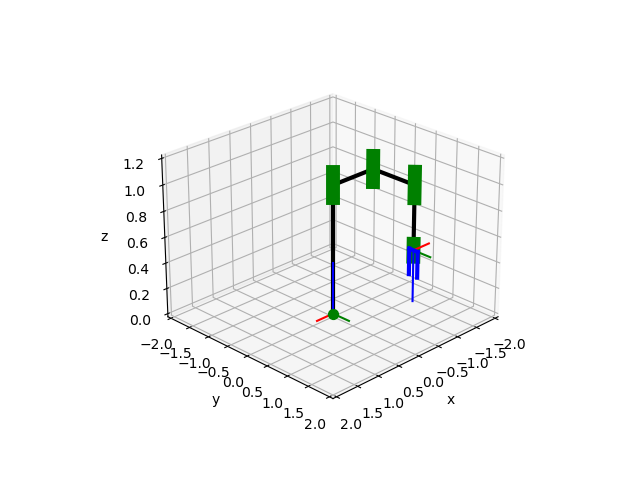

In [14]:
ax = graph_scara([0,0,0,0], l1, l2, l3, l4)